In [35]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [68]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings('ignore')
# Đọc dữ liệu từ tập tin CSV với các tùy chọn
df = pd.read_csv('/content/drive/MyDrive/Stock/NOK.csv')
df

# In ra 5 dòng đầu tiên của DataFrame
print(df.head())
df = df.dropna() # Drop missing values
df = df.reset_index(drop=True) # Reset the index


         Date  Open  High   Low  Close  Adj Close    Volume
0  2018-12-12  5.95  6.06  5.93   6.04   5.592633  48348500
1  2018-12-13  5.98  6.05  5.97   6.03   5.583373  31790800
2  2018-12-14  5.91  6.01  5.89   5.94   5.500039  17796500
3  2018-12-17  5.94  5.95  5.85   5.87   5.435223  26578100
4  2018-12-18  5.88  5.90  5.76   5.78   5.351890  19722400


In [89]:
# 2.  chia train test validate theo tỉ lệ 8:2
# Split the data into training, testing
train_size = int(0.8 * len(df))
test_size = int(0.2 * len(df))


X2D = df[['High']] # Biến độc lập theo mảng 2 chiều
Y2D = df[['Close']] # Biến phụ thuộc theo mảng 2 chiều



In [90]:
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

y_train = Y2D[:train_size]
x_train = X2D[:train_size]
y_test = Y2D[train_size:]
x_test = X2D[train_size:]
y_train_index = y_train.index # lấy ra index trước khi đổi nó về mảng 2 chiều ( phục vụ plot )
y_train = Y2D[:train_size].values.ravel()

# Tạo mô hình SVR với kernel RBF
model = SVR(kernel='rbf')
param_grid = {
    'C': [0.1, 1, 10, 100, 1000],             # Ví dụ các giá trị cho C
    'gamma': ['scale', 'auto', 0.001, 0.01, 0.1, 1],  # Ví dụ các giá trị cho gamma
    'epsilon': [0.001, 0.01, 0.1, 1, 10]      # Ví dụ các giá trị cho epsilon
}

# Tạo đối tượng GridSearchCV
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

# Huấn luyện mô hình sử dụng grid search
svr_rbf = grid_search.fit(x_train,y_train)

# In ra kết quả tốt nhất
print("Best parameters:", grid_search.best_params_)
print("Best score:", -grid_search.best_score_)


Best parameters: {'C': 10, 'epsilon': 0.01, 'gamma': 0.1}
Best score: 0.0041293597136341596


In [91]:
# dự đoán test

y_pred = svr_rbf.predict(x_test)
y_pred


array([4.91077633, 4.90087344, 5.0596522 , 4.99009545, 4.89097304,
       4.63422136, 4.62436217, 4.57507046, 4.59478665, 4.58492853,
       4.59478665, 4.61450337, 4.58492853, 4.64408105, 4.6046449 ,
       4.6933899 , 4.75259451, 4.6933899 , 4.78221578, 4.89097304,
       4.8415064 , 4.90087344, 4.97024898, 4.99009545, 4.86128623,
       4.8415064 , 4.70325435, 4.57507046, 4.62436217, 4.56521235,
       4.6046449 , 4.81185243, 4.74272382, 4.75259451, 4.71311988,
       4.8415064 , 4.89097304, 4.81185243, 4.67366394, 4.68352646,
       4.67366394, 4.67366394, 4.63422136, 4.64408105, 4.68352646,
       4.6933899 , 4.72298659, 4.73285454, 4.70325435, 4.64408105,
       4.66380225, 4.57507046, 4.66380225, 4.62436217, 4.62436217,
       4.65394132, 4.80197172, 4.80197172, 4.80197172, 4.71311988,
       4.78221578, 4.73285454, 4.66380225, 4.67366394, 4.46660857,
       4.53563684, 4.48633485, 4.56521235, 4.63422136, 4.67366394,
       4.65394132, 4.6046449 , 4.6933899 , 4.63422136, 4.71311

In [92]:
last_row = df.tail(1)
last_data = last_row['Close'].values.reshape(-1,1)
last_data

array([[3.12]])

In [93]:
# tạo mảng chứa giá trị predict của 30 ngày tiếp theo
x_next_30_days = []
# predict giá Close 30 ngày tiếp theo dựa vào giá Close của ngày trước đó
for i in range(30):
    x_pred_next = svr_rbf.predict(last_data)
    x_next_30_days.append(x_pred_next)
    last_data = x_pred_next.reshape(-1,1)
x_next_30_days

[array([3.05949915]),
 array([2.99694048]),
 array([2.9323736]),
 array([2.86592587]),
 array([2.7978224]),
 array([2.72840576]),
 array([2.65815256]),
 array([2.58768239]),
 array([2.51775405]),
 array([2.44924364]),
 array([2.3831011]),
 array([2.320286]),
 array([2.26168868]),
 array([2.20804927]),
 array([2.15989001]),
 array([2.11747508]),
 array([2.08080565]),
 array([2.04964864]),
 array([2.02358984]),
 array([2.00209773]),
 array([1.98458541]),
 array([1.97046181]),
 array([1.95916834]),
 array([1.95020122]),
 array([1.94312176]),
 array([1.93755817]),
 array([1.9332018]),
 array([1.92980055]),
 array([1.92715105]),
 array([1.92509083])]

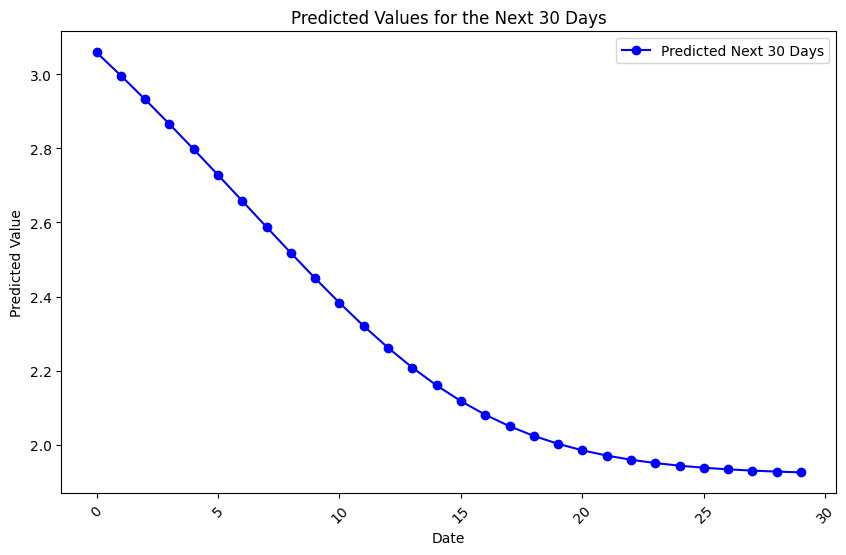

In [94]:

# Vẽ biểu đồ
plt.figure(figsize=(10, 6)) # Set the figure size
plt.plot(x_next_30_days, marker='o', color='b', label='Predicted Next 30 Days')

# Đặt tiêu đề và nhãn
plt.title('Predicted Values for the Next 30 Days')
plt.xlabel('Date')
plt.ylabel('Predicted Value')
plt.xticks(rotation=45) # Rotate x-axis labels for better readability
plt.legend()

# Hiển thị biểu đồ
plt.show()

In [95]:
# Chuyển cột predict price thành mảng 2 chiều
y_pred = y_pred.reshape(-1,1)

In [96]:
from sklearn.metrics import mean_absolute_percentage_error,mean_absolute_error
# 7. Đánh giá độ chính xác test bằng RMSE, MAE , MAPE
# RMSE
test_rmse = np.sqrt(np.mean((y_pred - y_test)**2))
print('Testing RMSE:', test_rmse)
# MAPE
test_mape = mean_absolute_percentage_error(y_test,y_pred)
print('Testing MAPE:', test_mape)
# MAE
test_mae = mean_absolute_error(y_test,y_pred)
print('Testing MAE:', test_mae)

Testing RMSE: Close    0.029859
dtype: float64
Testing MAPE: 0.0060163629438540625
Testing MAE: 0.0246680758714787


In [97]:
# Tạo index cho 30 ngày tiếp theo
last_index =  df.index[-1]
next_30_dates = pd.RangeIndex(start=last_index, stop=last_index+30, step=1)

Testing RMSE: Close    0.029859
dtype: float64
Testing MAPE: 0.0060163629438540625
Testing MAE: 0.0246680758714787


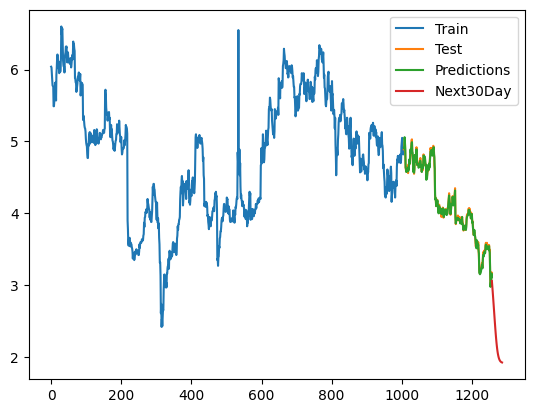

In [98]:
# 8. Tính RMSE
test_rmse = np.sqrt(np.mean((y_pred - y_test)**2))
print('Testing RMSE:', test_rmse)
# MAPE
test_mape = mean_absolute_percentage_error(y_test,y_pred)
print('Testing MAPE:', test_mape)
# MAE
test_mae = mean_absolute_error(y_test,y_pred)
print('Testing MAE:', test_mae)

# 9.Vẽ hình

plt.plot(y_train_index, y_train)
plt.plot(y_test.index, y_test)
plt.plot(y_test.index, y_pred)
plt.plot(next_30_dates,x_next_30_days)
plt.legend(['Train', 'Test', 'Predictions','Next30Day'])
plt.show()